In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import plotly.graph_objects as go 
from matplotlib import ticker
import math

### function

filename: RecBCD_plain2.csv    |  pixel_size: 154  |  time_step: 20
frame_start: 0  |    frame_end: -1  |  bin_size: 3
processing: downsample  |  plot_type: 2D  |  title: testing
X_axis_label: X  |  Y_axis_label: Y  |  Z_axis_label: Z


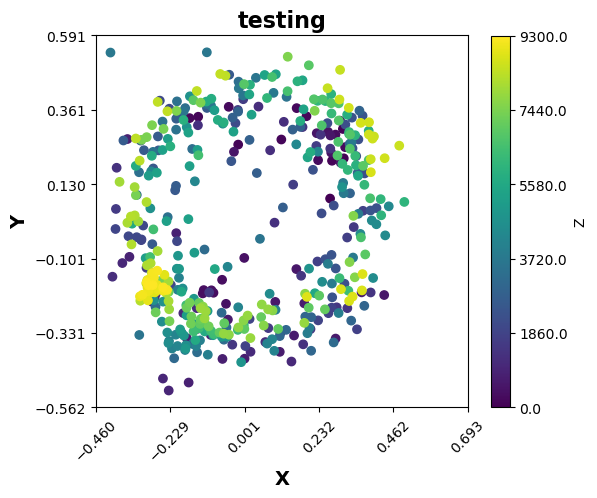

In [15]:


#1 use parameters, store parameters as callable variables 
#2 print paramters next to graph
#3 assign variables to titles, tick marks, data windows, etc.
#4 incorporate downsampling and filtering
#5 be able to import function (using a txt file or ipynb or whatever is needed) into new python

#filename="RecBCD_plain.csv"


#pixel_size= 154 #in nanometers
#time_step= 20
#frame_start= 0  #enter 0 to start from beginning    
#frame_end = -1   #enter -1 for full data set
#bin_size =        #bin size for downsampling/filter
#processing = ""  # enter downsample, filter, or none
#graph_type = ""  # enter 3D, 2D, interactive 
#title = ""
#X axis label
#Y axiz label
#Z axis label


parameters = {
'file_name': "RecBCD_plain2.csv",
'pixel_size': 154, #in nanometers
'time_step': 20, # in miliseconds
'frame_start': 0, #enter 0 to start from beginning
'frame_end': -1, # enter -1 for last value in data set
'bin_size': 3, # bin size for downsampling/filter
'processing': "downsample", #enter downsample, filter, or none
'plot_type': "2D", # enter 2D, 3D, or interactive
'title': "testing", 
'x_axis_label': "X",
'y_axis_label': "Y",
'z_axis_label': "Z",
'x_unit': 3, 
'y_unit': 4}   
def display_trajectory(file_name,pixel_size,time_step,frame_start,frame_end,bin_size,processing,plot_type,title,x_axis_label,y_axis_label,z_axis_label,x_unit,y_unit):
       
        print(*['filename:', file_name, '   | ' , 'pixel_size:', pixel_size , ' | ' , 'time_step:', time_step])
        
        print(*['frame_start:', frame_start,' |   ','frame_end:', frame_end, ' | ', 'bin_size:', bin_size])
        
        print(*['processing:', processing, ' | ',  'plot_type:', plot_type,' | ' ,'title:', title])
        
        print(*['X_axis_label:',x_axis_label,' | ',  'Y_axis_label:',y_axis_label ,' | ' ,'Z_axis_label:', z_axis_label])
        
        
    
        #read data file into a pandas data frame, add an index counter, and label columns
        data = pd.read_csv(file_name, header = None)
        data['index'] = range(len(data))
        data.columns = [ 'X position', 'Y position','index']
        data=data[['index','X position','Y position']]


        # find the average of X and Y column respectively
        ave = data.mean(axis=0)
        xave = ave.loc['X position']
        yave = ave.loc['Y position']

        #substract averages from each column to find displacement, store into new columns
        data["X displacement (pixels)"] = data['X position'] - xave
        data["Y displacement (pixels)"] = data['Y position'] - yave
        # mutiply pixel displacement columns by scaler to find nm displacement, store in new columns
        data["X displacement (nm)"] = data['X displacement (pixels)']*pixel_size
        data["Y displacement (nm)"]= data['Y displacement (pixels)']*pixel_size
        # multiply the index counter column by time_step to make a time step column, store into new column 
        data["Time (ms)"] = data['index']*time_step
        

        # assign plot_type variable to plot_type input
        
       
        if processing == "none":
        #this block graphs the data in 2D if prompt is met
            if plot_type == "2D":
                x = data.iloc[frame_start:frame_end,x_unit] # move this outside this block to apply for all "none"
                y = data.iloc[frame_start:frame_end,y_unit]
                z = data.iloc[frame_start:frame_end,7] #col 7 is the time col

                #plot sizing and location
                fig = plt.figure(figsize=(6,6), dpi=100)
                ax = fig.add_subplot(111) #learn this in depth

                #color bar color scheme assignment, graph type, colorbar size and alignment
                colors = cm.viridis(np.linspace(0, 1, len(z)))
                p=ax.scatter(x, y, c=colors)
                cbar = plt.colorbar(p, label= z_axis_label ,shrink= .82) 

                #setting the ticks on the colorbar to span the length of the time column with 6 increments
                cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1])
                
                tix = np.linspace(0,len(z),6)
                tix_c = tix*time_step
                cbar.set_ticklabels(tix_c)
                ax.yaxis.set_major_locator(ticker.LinearLocator(6))
                ax.xaxis.set_major_locator(ticker.LinearLocator(6))
                plt.axis('square')
                plt.xticks(rotation=45)
                # set graph limits to -1 to 1 pixel and -150 to 150 nm
                # increments .25 ish


                #axis labels and font configurations
                ax.set_xlabel(x_axis_label, fontweight = 'bold', fontsize = 14)
                ax.set_ylabel(y_axis_label, fontweight = 'bold', fontsize = 14)

                # plot title and font configurations
                plt.title(title , fontweight = 'bold', fontsize = 16)

                
                #plt.savefig('file_name.png', dpi=300)

                plt.show()



                #This block plots a static 3D graph if prompt is met
            if plot_type == "3D":
                
              

                x = data.iloc[frame_start:frame_end,x_unit]
                y = data.iloc[frame_start:frame_end,y_unit]
                z = data.iloc[frame_start:frame_end,7]#


                #This block splices the segments between data points and assigns each segment to a color
                points = np.array([x,y,z]).transpose().reshape(-1,1,3)
                segs = np.concatenate([points[:-1],points[1:]],axis=1)
                lc = Line3DCollection(segs, cmap = plt.get_cmap('cool'))
                lc.set_array(z)

                #This block plots the figure at a specified size, in 3D configuration, sets axis range, gathers the 
                #colored segments from above, and assigns labels
                fig = plt.figure(figsize=(8,8))
                ax = fig.gca(projection = '3d')
                ax.set_zlim(min(z), max(z))
                ax.set_xlim(min(x),max(x))
                ax.set_ylim(min(y),max(y))
                ax.add_collection3d(lc, zs=z, zdir='z')
                plt.title(title , fontweight = 'bold', fontsize= 16)
                ax.set_xlabel(x_axis_label, fontweight = 'bold', fontsize = 14)
                ax.set_ylabel(y_axis_label , fontweight = 'bold', fontsize = 14)
                ax.set_zlabel(z_axis_label, fontweight= 'bold' , fontsize =14)

                #plt.savefig('RecBCD_Origami_spinning_rotor_tip_16000-18000ms',dpi=300)

                plt.show()


            if plot_type == "interactive":

                x = data.iloc[frame_start:frame_end,x_unit]
                y = data.iloc[frame_start:frame_end,y_unit]
                z = data.iloc[frame_start:frame_end,7]

                #configure plot settings (currently called trace 1, may add more traces in the future)
                trace1=go.Scatter3d(x=x,
                                    y=y,
                                    z=z,
                                    mode = "lines",
                                    name = 'Original',
                                    marker=dict(
                                        size=4,
                                        color='#e9ebf0',
                                        opacity=0.7,
                                        showscale=False,
                                        colorbar=dict(
                                            title='Time (ms)')),
                                    line=dict(
                                        color='#e9ebf0',
                                        width=2))
                #assign traces
                fig = go.Figure(data=[trace1])

                #assign title
                fig.update_layout(title= title)
                #assign axis labels
                fig.update_layout(scene = dict(
                            xaxis_title= x_axis_label,
                            yaxis_title= y_axis_label,
                            zaxis_title= z_axis_label)) 

                #Here we can tweak the background color, grid color, and color of the origin for all axes/planes
                fig.update_layout(scene = dict(
                            xaxis = dict(
                                 backgroundcolor="black",
                                 gridcolor="gray",
                                 showbackground=True,
                                 zerolinecolor="white",),
                            yaxis = dict(
                                backgroundcolor="black",
                                gridcolor="gray",
                                showbackground=True,
                                zerolinecolor="white"),
                            zaxis = dict(
                                backgroundcolor="black",
                                gridcolor="gray",
                                showbackground=True,
                                zerolinecolor="white"),),
                          )

                #size and aspect ratio of the graph and the default camera zoom and angle 
                fig.update_layout(
                width=800,
                height=700,
                autosize=False,
                scene=dict(
                camera=dict(
                    up=dict(
                        x=0,
                        y=0,
                        z=1
                    ),
                    eye=dict(
                        x=1,
                        y=2,
                        z=2,
                    )
                ),
                aspectratio = dict( x=1, y=1, z=4 ),
                aspectmode = 'manual'
                ),
                )

                fig.show()


        #This block applys a simple moving average filter to the data and stores
        #the filtered data into a new pandas data frame 
        if processing == "filter":
            ma = pd.DataFrame(data.iloc[:,0])

            window = bin_size
            #Built in simple moving average function is applied to normal data and stored in dataframe "ma"
            ma['X movement' ] = data.iloc[:,1].rolling(window=window).mean()
            ma['Y movement'] = data.iloc[:,2].rolling(window=window).mean()
            ma['X displacement (pixels)'] = data.iloc[:,3].rolling(window=window).mean()
            ma['Y displacement(pixels)'] = data.iloc[:,4].rolling(window=window).mean()
            ma['X displacement (nm)'] = data.iloc[:,5].rolling(window=window).mean()
            ma['Y displacement (nm)'] = data.iloc[:,6].rolling(window=window).mean()
            ma['Time (ms)'] = data.iloc[:,7].rolling(window=window).mean()

            #This block delets the null spaces in the new dataframe and realigns the data
            ma = ma.apply (pd.to_numeric, errors='coerce')
            ma = ma.dropna()
            ma = ma.reset_index(drop=True)

            if plot_type == "2D":
                x = ma.iloc[frame_start:frame_end,x_unit]
                y = ma.iloc[frame_start:frame_end,y_unit]
                z = ma.iloc[frame_start:frame_end,7]


                #plot sizing and location
                fig = plt.figure(figsize=(6,6), dpi=100)
                ax = fig.add_subplot(111)

                #color bar color scheme assignment, graph type, colorbar size and alignment
                colors = cm.viridis(np.linspace(0, 1, len(z)))
                p=ax.scatter(x, y, c=colors)
                cbar = plt.colorbar(p, label= z_axis_label ,shrink= .82) 

                #setting the ticks on the colorbar to span the length of the time column with 6 increments
                cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1])
                length = len(z)
                tix = np.linspace(0,len(z),6)
                tix_c = tix*time_step
                cbar.set_ticklabels(tix_c)
                ax.yaxis.set_major_locator(ticker.LinearLocator(6))
                ax.xaxis.set_major_locator(ticker.LinearLocator(6))
                plt.axis('square')
                plt.xticks(rotation=45)

                #axis labels and font configurations
                ax.set_xlabel(x_axis_label, fontweight = 'bold', fontsize = 14)
                ax.set_ylabel(y_axis_label, fontweight = 'bold', fontsize = 14)

                # plot title and font configurations
                plt.title(title , fontweight = 'bold', fontsize = 16)

                #aspect ratio
                ax.set_aspect(aspect=1)
                #plt.savefig('Spinning_Rotor_scatter_RecBCD_WIP.png', dpi=300)

                plt.show()


                #This block plots a static 3D graph if prompt is met
            if plot_type == "3D":

                x = ma.iloc[frame_start:frame_end,x_unit]
                y = ma.iloc[frame_start:frame_end,y_unit]
                z = ma.iloc[frame_start:frame_end,7]

                #This block splices the segments between data points and assigns each segment to a color
                points = np.array([x,y,z]).transpose().reshape(-1,1,3)
                segs = np.concatenate([points[:-1],points[1:]],axis=1)
                lc = Line3DCollection(segs, cmap = plt.get_cmap('cool'))
                lc.set_array(z)

                #This block plots the figure at a specified size, in 3D configuration, sets axis range, gathers the 
                #colored segments from above, and assigns labels
                fig = plt.figure(figsize=(8,8))
                ax = fig.gca(projection = '3d')
                ax.set_zlim(min(z), max(z))
                ax.set_xlim(min(x),max(x))
                ax.set_ylim(min(y),max(y))
                ax.add_collection3d(lc, zs=z, zdir='z')
                plt.title(title , fontweight = 'bold', fontsize= 16)
                ax.set_xlabel(x_axis_label, fontweight = 'bold', fontsize = 14)
                ax.set_ylabel(y_axis_label , fontweight = 'bold', fontsize = 14)
                ax.set_zlabel(z_axis_label, fontweight= 'bold' , fontsize =14)

                #plt.savefig('RecBCD_Origami_spinning_rotor_tip_16000-18000ms',dpi=300)

                plt.show()



            if plot_type == "interactive":
                x = ma.iloc[frame_start:frame_end,x_unit]
                y = ma.iloc[frame_start:frame_end,y_unit]
                z = ma.iloc[frame_start:frame_end,7]

                #configure plot settings (currently called trace 1, may add more traces in the future)
                trace1=go.Scatter3d(
                    x=x,
                    y=y,
                    z=z,
                    mode = "lines",
                    name = 'Original',
                    marker=dict(
                        size=4,
                        color='#e9ebf0',
                        opacity=0.7,
                        showscale=False,
                        colorbar=dict(title='Time (ms)')),
                    line=dict(
                        color='#e9ebf0',
                        width=2))
                #assign traces
                fig = go.Figure(data=[trace1])

                #assign title
                fig.update_layout(title= title)
                #assign axis labels
                fig.update_layout(scene = dict(
                            xaxis_title= x_axis_label,
                            yaxis_title= y_axis_label,
                            zaxis_title= z_axis_label))

                #Here we can tweak the background color, grid color, and color of the origin for all axes/planes
                fig.update_layout(scene = dict(
                            xaxis = dict(
                                 backgroundcolor="black",
                                 gridcolor="gray",
                                 showbackground=True,
                                 zerolinecolor="white",),
                            yaxis = dict(
                                backgroundcolor="black",
                                gridcolor="gray",
                                showbackground=True,
                                zerolinecolor="white"),
                            zaxis = dict(
                                backgroundcolor="black",
                                gridcolor="gray",
                                showbackground=True,
                                zerolinecolor="white"),),
                          )

                #size and aspect ratio of the graph and the default camera zoom and angle 
                fig.update_layout(
                width=800,
                height=700,
                autosize=False,
                scene=dict(
                camera=dict(
                    up=dict(
                        x=0,
                        y=0,
                        z=1
                    ),
                    eye=dict(
                        x=1,
                        y=2,
                        z=2,
                    )
                ),
                aspectratio = dict( x=1, y=1, z=4 ),
                aspectmode = 'manual'
                ),
                )

                fig.show()

        #This block applies a downsampling technique to the data and stores the downsampled data
        # in a new pandas dataframe called "da"
        # this techique takes the average of a specified amount of data points and stores the result into the new dataframe
        #it then moves on to the next set of data points and so on, such that each datapoint from the original set
        # is only sampled once
        if processing == "downsample":
            da=pd.DataFrame(data.iloc[:,:])
            #divide original index by sample size and round to nearest whole number to 
            #achieve new index number underwhich the origial index is stored
            u= math.floor(frame_start/bin_size)
            v= math.floor(frame_end/bin_size)


            #copy the time column into a numpy array

            #isolate the column (if we print this it will show as a dataframe with 2 cols: indexes and time values)
            daT_column=da.iloc[:,7]
            daDY_column=da.iloc[:,6]
            daDX_column=da.iloc[:,5]
            daPY_column=da.iloc[:,4]
            daPX_column=da.iloc[:,3]
            daI_column=da.iloc[:,0]
            daX_column=da.iloc[:,1]
            daY_column=da.iloc[:,2]
            #We just want the values in the column
            daT = daT_column.values
            daDY = daDY_column.values
            daDX = daDX_column.values
            daPY = daPY_column.values
            daPX = daPX_column.values
            daI = daI_column.values
            daX = daX_column.values
            daY= daY_column.values
            #This function taken from https://stackoverflow.com/questions/10847660/subsampling-averaging-over-a-numpy-array
            # allows us to downsample by averages over a set number 
            #(change 'n' to the number of values you want to average over)
            def average(arr, n):
                end =  n * int(len(arr)/n)
                return np.mean(arr[:end].reshape(-1, n), 1)
            #Takes the time column from our 'da' dataframe and runs the function over it
            #stores the new values in variables as an array (values in a row)

            # can change the k parameter to chnage the bin size (I suggest to keep this as 3 for this kernal)
            # If you want to change the bin size scroll down to other kernal


            #assigning each new row to a varialble
            Time = average(daT,bin_size)
            Index = average(daI,bin_size)
            Xda = average(daX,bin_size)
            Yda = average(daY,bin_size)
            Ydisnm = average(daDY,bin_size)
            Xdisnm = average(daDX,bin_size)
            YdisP = average(daPY,bin_size)
            XdisP = average(daPX,bin_size)


            #reshapes the data in a 1D column
            TimeT = Time[:, np.newaxis]
            YdisnmT = Ydisnm[:, np.newaxis]
            XdisnmT = Xdisnm[:, np.newaxis]
            YdisPT = YdisP[:, np.newaxis]
            XdisPT = XdisP[:,np.newaxis]
            XdaT = Xda[:, np.newaxis]
            YdaT = Yda[:,np.newaxis]
            IndexT = Index[:,np.newaxis]

            #stores in a new dataframe 'dsak' for: downsampling average k, k=bin size
            dsak= pd.DataFrame(IndexT, columns=['Index'])
            #appending to our data frame
            dsak['X movement'] = XdaT
            dsak['Y movement'] = YdaT
            dsak['X displacement (pixels)'] = XdisPT
            dsak['Y displacement (pixels)'] = YdisPT
            dsak['X displacement (nm)'] = XdisnmT 
            dsak['Y displacement (nm)'] = YdisnmT
            dsak['Time (ms)'] = TimeT
            
            



            if plot_type == "2D":
                x = dsak.iloc[u:v,x_unit]
                y = dsak.iloc[u:v,y_unit]
                z = dsak.iloc[u:v,7]


                #plot sizing and location


                fig = plt.figure(figsize=(6,6), dpi=100)
                ax = fig.add_subplot(111)



                #color bar color scheme assignment, graph type, colorbar size and alignment
                colors = cm.viridis(np.linspace(0, 1, len(z)))
                p=ax.scatter(x, y, c=colors)
                cbar = plt.colorbar(p, label= z_axis_label ,shrink= .82) 

                #setting the ticks on the colorbar to span the length of the time column with 6 increments
                cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1])
                length = len(z)
                tix = np.linspace(0,len(z),6)
                tix_c = tix*time_step
                cbar.set_ticklabels(tix_c)
                ax.yaxis.set_major_locator(ticker.LinearLocator(6))
                ax.xaxis.set_major_locator(ticker.LinearLocator(6))
                plt.axis('square')
                plt.xticks(rotation=45)

                #axis labels and font configurations
                ax.set_xlabel(x_axis_label, fontweight = 'bold', fontsize = 14)
                ax.set_ylabel(y_axis_label, fontweight = 'bold', fontsize = 14)

                # plot title and font configurations
                plt.title(title , fontweight = 'bold', fontsize = 16)

                #aspect ratio
                #plt.xticks(np.arange(min(x), max(x)+1, 1.0))
                #plt.savefig('Spinning_Rotor_scatter_RecBCD_WIP.png', dpi=300)

                plt.show()


                #This block plots a static 3D graph if prompt is met
            if plot_type == "3D":


                x = dsak.iloc[u:v,x_unit]
                y = dsak.iloc[u:v,y_unit]
                z = dsak.iloc[u:v,7]
                


                #This block splices the segments between data points and assigns each segment to a color
                points = np.array([x,y,z]).transpose().reshape(-1,1,3)
                segs = np.concatenate([points[:-1],points[1:]],axis=1)
                lc = Line3DCollection(segs, cmap = plt.get_cmap('cool'))
                lc.set_array(z)

                #This block plots the figure at a specified size, in 3D configuration, sets axis range, gathers the 
                #colored segments from above, and assigns labels
                fig = plt.figure(figsize=(8,8))
                ax = fig.gca(projection = '3d')
                ax.set_xlim(min(x),max(x))
                ax.set_ylim(min(y),max(y))
                ax.set_zlim(min(z), max(z))
                ax.add_collection3d(lc, zs=z, zdir='z')
                plt.title(title , fontweight = 'bold', fontsize= 16)
                ax.set_xlabel(x_axis_label, fontweight = 'bold', fontsize = 14)
                ax.set_ylabel(y_axis_label , fontweight = 'bold', fontsize = 14)
                ax.set_zlabel(z_axis_label, fontweight= 'bold' , fontsize =14)

                #plt.savefig('RecBCD_Origami_spinning_rotor_tip_16000-18000ms',dpi=300)
                
                plt.show()
                

            if plot_type == "interactive":
                x = dsak.iloc[u:v,x_unit]
                y = dsak.iloc[u:v,y_unit]
                z = dsak.iloc[u:v,7]

                #configure plot settings (currently called trace 1, may add more traces in the future)
                trace1=go.Scatter3d(
                    x=x,
                    y=y,
                    z=z,
                    mode = "lines",
                    name = 'Original',
                    marker=dict(
                        size=4,
                        color='#e9ebf0',
                        opacity=0.7,
                        showscale=False,
                        colorbar=dict(
                            title='Time (ms)')),
                    line=dict(
                        color='#e9ebf0',
                        width=2))
                
                #assign traces
                fig = go.Figure(data=[trace1])

                #assign title
                fig.update_layout(title= title)
                #assign axis labels
                fig.update_layout(scene = dict(
                            xaxis_title= x_axis_label,
                            yaxis_title= y_axis_label,
                            zaxis_title= z_axis_label))

                #Here we can tweak the background color, grid color, and color of the origin for all axes/planes
                fig.update_layout(scene = dict(
                            xaxis = dict(
                                 backgroundcolor="black",
                                 gridcolor="gray",
                                 showbackground=True,
                                 zerolinecolor="white",),
                            yaxis = dict(
                                backgroundcolor="black",
                                gridcolor="gray",
                                showbackground=True,
                                zerolinecolor="white"),
                            zaxis = dict(
                                backgroundcolor="black",
                                gridcolor="gray",
                                showbackground=True,
                                zerolinecolor="white"),),
                          )

                #size and aspect ratio of the graph and the default camera zoom and angle 
                fig.update_layout(
                width=800,
                height=700,
                autosize=False,
                scene=dict(
                camera=dict(
                    up=dict(
                        x=0,
                        y=0,
                        z=1
                    ),
                    eye=dict(
                        x=1,
                        y=2,
                        z=2,
                    )
                ),
                aspectratio = dict( x=1, y=1, z=4 ),
                aspectmode = 'manual'
                ),
                )

                fig.show()


        return


display_trajectory(**parameters)


In [ ]:
##Big ticket item
#rearrange code to be future compatible by making data processing and visualization into two modules
#This might be done by assigning processed dataframes to global variables that can be called by the graphing functions 
#depending on user input
##check list items
#Store values in dictionary to be called by function
#remove unneccessary axis label tags ("x2" to "x" and ax2 --> ax)
#ax = fig.add_subplot(111) #learn this in depth for future subplot endeavors
#make code easier to read (no long lines)
# set ticks to exist within a pixel or nm range of -1 to 1 and -100 nm to 100 nm

In [10]:
dict = {'name': 'dom', 'age': 28, 'occupation':'student'}
print(dict['name'])

dom
